In [1]:
from qiskit import QuantumCircuit, QuantumRegister,Aer, IBMQ, execute,assemble,ClassicalRegister,transpile
from qiskit.visualization import plot_histogram,array_to_latex,plot_bloch_multivector
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize



import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Load IBM account
provider = IBMQ.load_account()
ibmq_qasm_simulator = provider.get_backend('ibmq_qasm_simulator')

## Puertas cuánticas de 1 qbit

A continuación, se ilustra el comportamiento teórico y experimental de las puertas de Pauli X (o puerta NOT), Y y Z, cuyas matrices se definen como

$$X=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}, \quad Y=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}, \quad Z=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}.$$

Para ello, se crea un circuito de medida con 1 qbit y 1 bit para hacer corresponder los qbits a los bits clásicos $0$ y $1$ y se añade esta medida a los circuitos creados para cada puerta de Pauli inicializadas en el qbit 0.

In [2]:
# Let's do a measurement circuit with 1 qubit and 1 bit
qc_m = QuantumCircuit(1, 1)
qc_m.measure([0], [0])

/tmp/ipykernel_115/3712920614.py:5: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qcX += qc_m
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


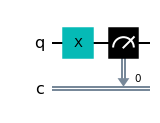

In [3]:
# Let's do an X-gate on a |0> qubit
qcX = QuantumCircuit(1)
qcX.x(0)

qcX += qc_m
qcX.draw('mpl')

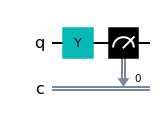

In [4]:
# Let's do an Y-gate on a |0> qubit
qcY = QuantumCircuit(1)
qcY.y(0)

qcY += qc_m
qcY.draw('mpl')

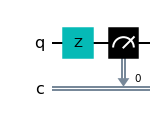

In [5]:
# Let's do an Z-gate on a |0> qubit
qcZ = QuantumCircuit(1)
qcZ.z(0)

qcZ += qc_m
qcZ.draw('mpl')

In [6]:
# Execute the circuits X,Y and Z on the simulator
job_X = execute(qcX, ibmq_qasm_simulator, shots=1024)
job_Y = execute(qcY, ibmq_qasm_simulator, shots=1024)
job_Z = execute(qcZ, ibmq_qasm_simulator, shots=1024)

# Grab the results from the job and counts
result_X = job_X.result()
result_Y = job_Y.result()
result_Z = job_Z.result()

# Counts the results
counts_X = result_X.get_counts(qcX)
counts_Y = result_Y.get_counts(qcY)
counts_Z = result_Z.get_counts(qcZ)

Las salidas correspondientes para cada puerta de Pauli deben ser:

$$X|0\rangle=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ 1\end{pmatrix}=|1\rangle.$$

$$Y|0\rangle=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ i\end{pmatrix}=i|1\rangle.$$

$$Z|0\rangle=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}1\\ 0\end{pmatrix}=|0\rangle.$$

Es decir, se obtendrá el qubit $|1\rangle$ en las puertas $X$ y $Y$ con probabilidad $|1|^2=1$ y $|i|^2=1$ respectivamente, y el qbit $|0\rangle$ en la puerta $Z$ con probabilidad $|1|^2=1$ .

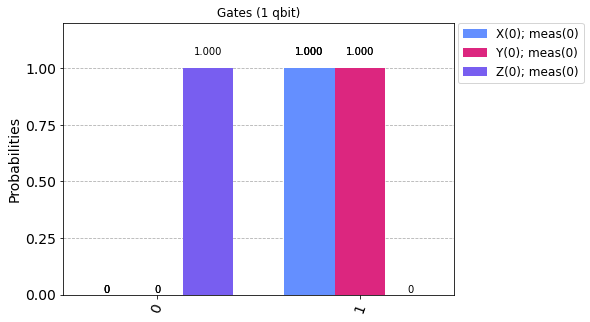

In [7]:
plot_histogram([counts_X,counts_Y,counts_Z], title="Gates (1 qbit)", legend=['X(0); meas(0)', 'Y(0); meas(0)', 'Z(0); meas(0)'],)

Como vemos, para el qbit $q_0=0$, las salidas obtenidas coinciden con las esperadas.

## Puertas cuánticas de 2 qbits

### CNOT

En este caso se prueba la puerta $C_X$ o $CNOT$, la cual opera sobre 2 qbits y aplica un $NOT$ al qbit objetivo si el qbit de control toma el valor $|1\rangle$. En esta puerta consideramos que el qbit de control es $q_0$. 

La matriz que representa la puerta $C_X$ es

$$C_X=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0\end{pmatrix}.$$

y

$$C_X|00\rangle=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=|00\rangle$$


In [8]:
qc_m = QuantumCircuit(2, 2)
qc_m.measure([0,1], [0,1])

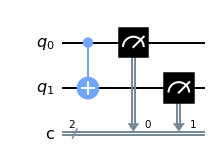

In [9]:
qcCX = QuantumCircuit(2)
qcCX.cx(0, 1)
qcCX += qc_m
qcCX.draw('mpl')

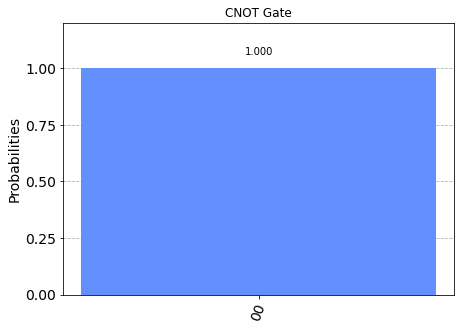

In [10]:
job_CX = execute(qcCX, ibmq_qasm_simulator, shots=1024)
result_CX = job_CX.result()
counts_CX = result_CX.get_counts(qcCX)

plot_histogram(counts_CX, title="CNOT Gate")

Vemos que el valor obtenido coincide con el valor esperado. Sin embargo, este circuito no tiene mucho sentido ya que los dos qbits están inicializados a $0$ y por tanto la salida de ambas mediciones será siempre $0$.

Nos interesa probar el funcionamiento de la puerta $CNOT$ para los distintos valores de $q_0$ y $q_1$ y por tanto, se utiliza una puerta de Hadamard para realizar las simulaciones.

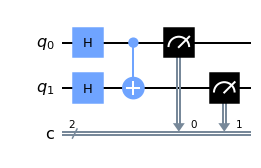

In [11]:
qcCX = QuantumCircuit(2, 2)
qcCX.h(0)
qcCX.h(1)
qcCX.cx(0, 1)
qcCX += qc_m
qcCX.draw('mpl')

{'00': 257, '01': 249, '10': 270, '11': 248}


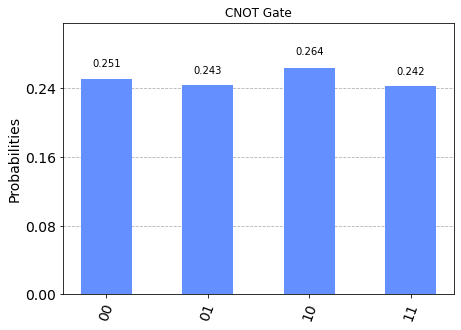

In [13]:
job_CX = execute(qcCX, ibmq_qasm_simulator, shots=1024)
result_CX = job_CX.result()
counts_CX = result_CX.get_counts(qcCX)

print(counts_CX)
plot_histogram(counts_CX, title="CNOT Gate")

## Generación de números aleatorios


Utilizando puertas Hadamard, se implementa un generador de números aleatorios de 8 bits. 

Para ello, se utilizan 8 qbits en superposición y se realizan las mediciones de cada qbit, de manera que cada qbit colapsará a 0 o 1 con la misma probabilidad al utilizar una puerta Hadamard. Por tanto, si representamos el histograma tras realizar $1024·8=8192$ ejecuciones se espera que los $2^8=256$ posibles valores aparezan unas $8192/256=32$ veces.

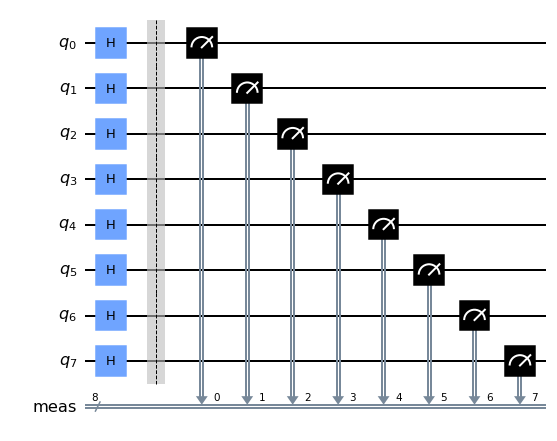

In [14]:
qcR = QuantumCircuit(8)
qcR.h(QuantumRegister(8, 'q'))
qcR.measure_all()
qcR.draw('mpl')

In [15]:
job_R = execute(qcR, ibmq_qasm_simulator, shots=8192)
result_R = job_R.result()
counts_R = job_R.result().get_counts(qcR)

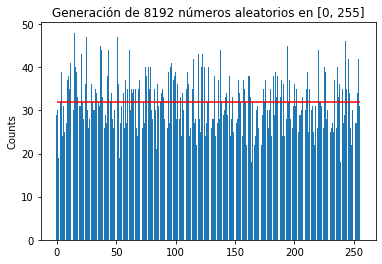

In [16]:
counts =  counts_R.values()
values = range(len(counts))
plt.bar(values,counts)
plt.hlines(32,0,255, color = 'r')
plt.title("Generación de 8192 números aleatorios en [0, 255]")
plt.ylabel("Counts")
plt.show()

## Entrelazamiento

Se comprueba el comportamiento del circuito descrito abajo y se explica por qué el resultado es una función de onda entrelazada.

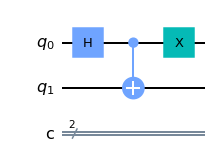

In [17]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.x(0)

qc.draw(output='mpl')

Dos qbits se encuentran entrelazados cuando el sistema toma valor  $\frac{1}{\sqrt{2}}(|10\rangle-|01\rangle)$, es decir, toma el valor $|10\rangle$ con probabilidad $\frac{1}{2}$ y el valor $|01\rangle$ con probabilidad $\frac{1}{2}$, mientras que tiene un $0\%$ de probabilidad de medirse en los estados $|00\rangle$ y $|11\rangle$. 

Para este tipo de sistemas, observando el estado de un qubit puedo conocer el estado del otro al que está entrelazado sin necesidad de medir el segundo. ya que si el primer qubit resulta ser $|0\rangle$, el segundo necesariamente será $|1\rangle$, y viceversa.

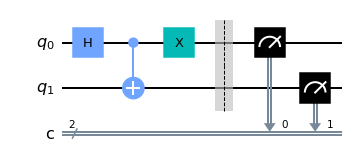

In [18]:
qc.barrier()
qc.measure([0,1], [0,1])
qc.draw(output='mpl')

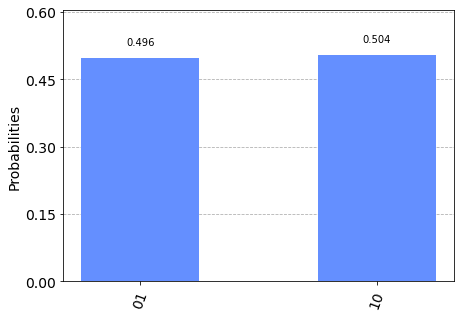

In [19]:
result = execute(qc, ibmq_qasm_simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

Viendo los resultados del histograma ($\frac{1}{\sqrt{2}}(|10\rangle-|01\rangle)$), podemos concluir que el resultado del circuito es un entrelazamiento, ya que se exhiben correlaciones.

## Sumador de 2 qbits

Las posibles salidas de nuestro circuito sumador deberán ser las siguientes:

1. $0 + 0 = 00$
2. $0 + 1 = 01$
3. $1 + 0 = 01$
4. $1 + 1 = 10$

In [20]:
def QuantumCircuitSum(a, b):
    qc_ha = QuantumCircuit(4,2)
    if a == 1:
        qc_ha.x(0)
    if b == 1:
        qc_ha.x(1)
    qc_ha.barrier()
    # use cnots to write the XOR of the inputs on qubit 2
    qc_ha.cx(0,2)
    qc_ha.cx(1,2)
    # use ccx to write the AND of the inputs on qubit 3
    qc_ha.ccx(0,1,3)
    qc_ha.barrier()
    # extract outputs
    qc_ha.measure(2,0) # extract XOR value
    qc_ha.measure(3,1) # extract AND value
    return qc_ha

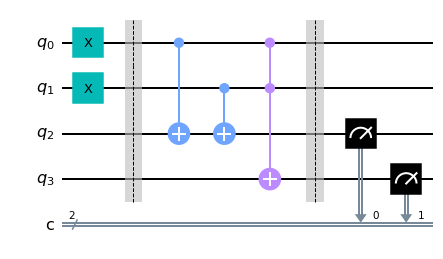

In [21]:
qc_ha_00 = QuantumCircuitSum(0,0)
qc_ha_01 = QuantumCircuitSum(0,1)
qc_ha_10 = QuantumCircuitSum(1,0)
qc_ha_11 = QuantumCircuitSum(1,1)

#example draw
qc_ha_11.draw()

A continuación, se explica el circuito representado arriba.

Las líneas discontinuas en la imagen son solo para distinguir las diferentes partes del circuito.

La primera parte del circuito codifica la entrada, la parte del centro se encarga de ejecutar el algoritmos y por último, se extrae el resultado. 

En primer lugar, los dos qbits que queremos sumar están codificados en los qbits 0 y 1. Dado que Qiskit inicializa a 0 por defecto el valor del qbit, la primera puerta $NOT$ es necesaria cuando queramos que alguno de los dígitos tome el valor 1. 

Respecto al algoritmo central, el bit más significativo del resultado está determinado por una puerta $XOR$ o $CNOT$ y una puerta $NOT$, es decir, vale $1$ si las dos entradas son iguales. Como no queremos sobreescribir ninguna de las entradas, se utilizan dos qbits más para la puerta $CNOT$. Así, la única entrada que devuelve la salida $1$ es el caso $1+1$. Finalmente, necesitamos una puerta $NOT$ en el qbit 3, y ese resultado se consigue utilizando una puerta $CNOT$ controlada en 2 qbits de manera que se utiliza un $NOT$ en el qbit objetivo sólo cuando los 2 qbits de control estén en el estado $1$.

En cuanto a la salida, el resultado será una cadena de 2 bits que leeremos de los qbits 2 y 3. 


/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackend.py:906: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name,


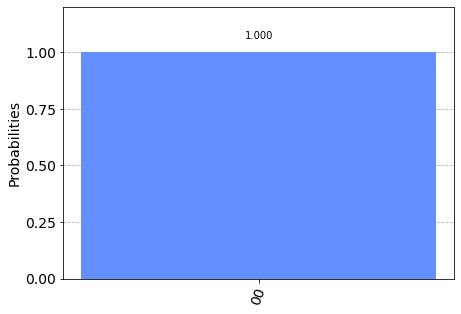

In [22]:
# 0+0
qobj = assemble(qc_ha_00)
counts = ibmq_qasm_simulator.run(qobj).result().get_counts()
plot_histogram(counts)

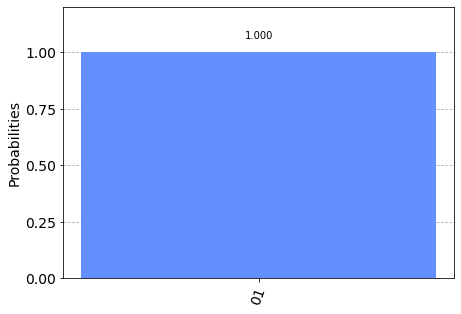

In [23]:
# 1+0
qobj = assemble(qc_ha_10)
counts = ibmq_qasm_simulator.run(qobj).result().get_counts()
plot_histogram(counts)

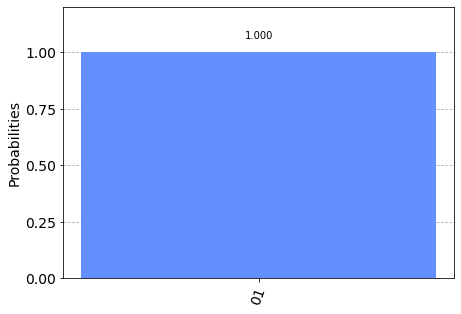

In [24]:
# 0+1
qobj = assemble(qc_ha_01)
counts = ibmq_qasm_simulator.run(qobj).result().get_counts()
plot_histogram(counts)

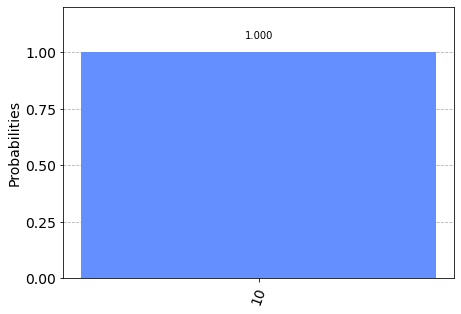

In [25]:
# 1+1
qobj = assemble(qc_ha_11)
counts = ibmq_qasm_simulator.run(qobj).result().get_counts()
plot_histogram(counts)

# ALGORITMOS CUÁNTICOS


## Teletransportación cuántica

Este algoritmo pretende transmitir el estado de un qbit emisor $|\psi\rangle=\alpha|0\rangle + \beta|1\rangle$ a otro qbit receptor. 

El circuito cuántico encargado de realizar esta transmisión necesita utilizar 3 qbits y 2 bits clásicos en 2 registros distintos. 

En primer lugar, se crean un par de qbits denominados par Bell, que se corresponderán con un qbit del emisor ($q_1$)y un qbit del receptor ($q_2$) en estado entrelazado. Este par se consigue utilizando una puerta Hadamard sobre el qbit $q_1$ y posteriormente, utilizando una puerta $CNOT$ sobre el qbit $q_2$, siendo $q_1$ el qbit de control.

A continuación, el emisor utiliza el qbit $q_0$ que quiere enviar como control de una puerta $CNOT$ sobre el qbit del par Bell entrelazado y le aplica una puerta Hadamard a $q_0$.

Después el emisor mide los dos qbits que posee ($q_0$ y $|\psi\rangle$), almacena este resultado en los dos bits clásicos y envía el resultado al receptor.

En este momento, el receptor tiene el qbit $q_2$ y aplicará las siguientes puertas dependiendo de la información de los dos bits clásicos. Es importante notar que el receptor obtendrá los cuatro estados posibles con la misma probabilidad. Si el receptor recibe $00$, sabrá que su qbit está en el estado que le querían enviar. Si recibe $01$ entonces deberá aplicar una puerta $NOT$ a $q_2$ para intercambiar los coeficientes y recuperar el estado inicial. Si recibe $10$ tendrá que aplicar una puerta $Z$ a $q_2$ para cambiar el signo del segundo coeficiente y si recibe un $11$, tendrá que aplicar una puerta $NOT$ seguida de una puerta $Z$.

Para probar el desempeño de nuestro circuito, se utilizará un simulador para verificar que nuestro qbit se ha teletransportado correctamente. Para ello, se inicializa el qbit $q_0=|\psi\rangle$ utilizando un estado aleatorio y antes de obtener la salida, se realiza una inversión del qbit $q_2$ en el estado $|\psi\rangle$ al estado $|0\rangle$ De esta manera, se espera que si la teletransportación del qbit $q_0$ al qbit $q_2$ se ha realizado correctamente, mediremos un estado igual a $|0\rangle$.


In [26]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target
    
def emisor_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
    
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to the receptor"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def receptor_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


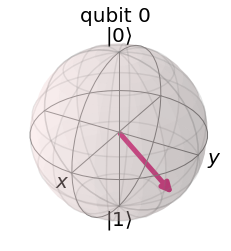

In [27]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [28]:
## Init gate
init_gate = Initialize(psi)
init_gate.label = "init"

inverse_init_gate = init_gate.gates_to_uncompute()

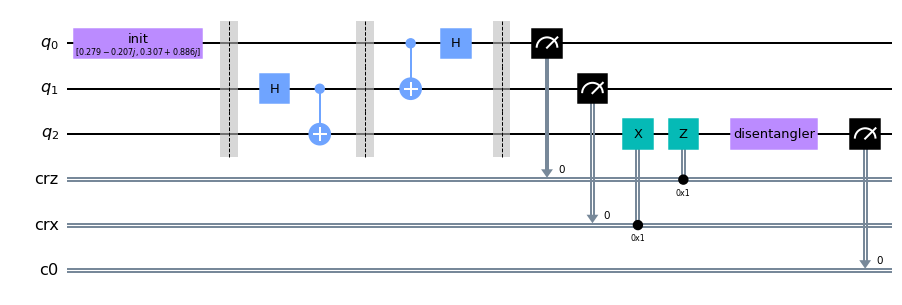

In [29]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
cr_result = ClassicalRegister(1)
qc = QuantumCircuit(qr, crz, crx, cr_result)


## STEP 0
# First, let's initialize emisor's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
emisor_gates(qc, 0, 1)

## STEP 3
# Emisor then sends her classical bits to receptor
measure_and_send(qc, 0, 1)

## STEP 4
# Receptor decodes qubits
receptor_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# to see the result
qc.measure(2,2)

# Display the circuit
qc.draw()

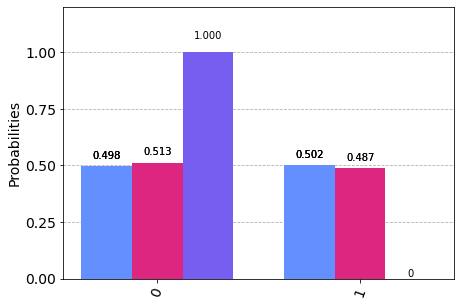

In [30]:
counts = ibmq_qasm_simulator.run(transpile(qc, ibmq_qasm_simulator)).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

Concluimos que tenemos un $100\%$ de posibilidades de medir  $q_0$ en stado $|0\rangle$.

## Algoritmo de Bernstein-Vazirani 

Sea una función

$$f\colon\{0,1\}^n\rightarrow \{0,1\}$$

tal que  $f(x)$ es el producto de $x$ por una cadena secreta $s\in \{0,1\}^n$, es decir, 

$$f(x) = x \cdot s = x_1s_1 \oplus x_2s_2 \oplus \cdots \oplus x_ns_n,$$

se pide encontrar $s$.

La solución clásica a este problema consiste en realizar $n$ consultas a la función para poder encontrar el valor de $s$. Sin embargo, el algoritmo cuántico sólo necesita realizar una consulta. Las operaciones que realiza son las siguientes:

1. Inicializar los qbits de entrada a $|0\rangle^{\otimes n}$ y el qbit de salida al estado $|-\rangle$.
2. Aplicar una puerta de Hadamard al qbit de entrada
3. Consultar $f$
4. Aplicar una puerta de Hadamard al registro de entrada
5. Medir

Los pasos anteriores se representan de manera resumida como: 

$$|0\rangle^n \xrightarrow{H^{\otimes n }} \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} |x\rangle \xrightarrow{f} \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}(-1)^{f(x)}|x\rangle \xrightarrow{H^{\otimes n}} \frac{1}{2^n} \sum_{x,y \in \{0,1\}^n}(-1)^{f(x) + x\cdot y}|y\rangle = |s\rangle$$

Por ejemplo, para $s=11$ la solución sería

$$|00\rangle \xrightarrow{H^{\otimes n }} \frac{1}{\sqrt{2}}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) \xrightarrow{f} \frac{1}{\sqrt{2}}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \xrightarrow{H^{\otimes n}} |11\rangle$$

A continuación se representa el algoritmo cuántico utilizando las librerías de Qiskit y para ilustrar el problema se utilizará una cadena de 2 bits $s=11$. 

In [31]:
n = 2 # number of qubits used to represent s
s = '11'   # the hidden binary string

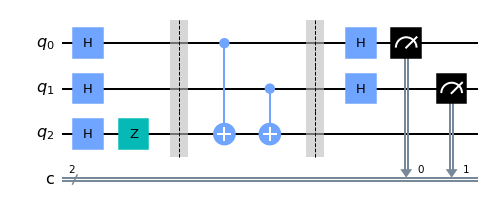

In [32]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

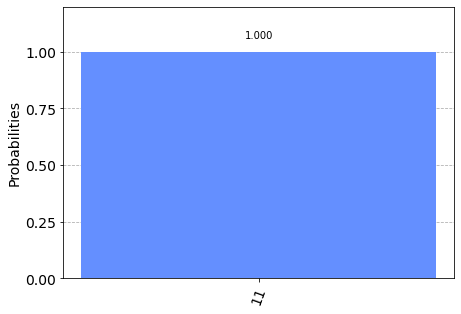

In [33]:
qobj = assemble(bv_circuit,shots=1024)
results = ibmq_qasm_simulator.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)